# Principal Component Analysis

## <a name="overview"></a> Overview

Working with high dimensional data is not easy as  this data is difficult to process and to visualize. We would like therefore to be able to transform the data such that by loosing only a small amount of information we amend it into a more practical form. One such methodology, is 
<a href="https://en.wikipedia.org/wiki/Principal_component_analysis">principal component analysis or PCA</a>. PCA is an unsupervised learning algorithm as it does not
involve any labels.

PCA is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest. PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. The $i-$th principal component can be taken as a direction orthogonal to the first $i − 1$ principal components that maximizes the variance of the projected data [1]. In this section we discuss the classical PCA. The following section discusses the probabilistic PCA.

PCA is a versatile methodology and as a dimensionality reduction techinque, it can be used for visualization of high-dimensional data, for noise filtering, and for feature selection. 

## <a name="ekf"></a> Principal component analysis

Let's consider a dataset $\mathbf{D}$ that has $m$ features and $n$ observations. PCA finds a low-dimensional representation of $\mathbf{D}$ 
such that it contains as much as possible of the variation. 
The idea is that not all of the $m$ dimensions are equally interesting. Thus PCA seeks a small number of dimensions that are as interesting as possible, where the concept of interesting is measured by the amount that the observations vary along each dimension. Each of the dimensions found by PCA is a linear combination of the $m$ features. 
Let's see how we can construct these components

The first principal component, $C_1$, is a normalized linear combination of the features i.e.

$$C_1 = w_{11}d_1 + \dots + w_{p1}d_p $$

with 

$$\sum_{i=1}^m w_{i1}^2 = 1$$

The component $C_1$ is chosen as the component that has the largest variance.


----
**Remark**

The coefficients $w_{ij}$ are known as the loadings of the component. They make up the principal component loading vector

$$\mathbf{w}_1 = \left(w_{11},w_{21}, \dots, w_{m1} \right)$$

We constrain the loadings so that
their sum of squares is equal to one, since otherwise setting these elements
to be arbitrarily large in absolute value could result in an arbitrarily large
variance.

----

So how can we compute $C_1$? We look for the linear combination of the sample feature values of the form

$$C_{i1} = w_{11}d_{i1} + \dots + w_{p1}d_{ip}$$

that has the largest sample variance subject to the constraint

$$\sum_{i=1}^m w_{i1}^2 = 1$$

In other words, we are trying to solve the following optimization problem 


$$\text{maximize}_{w_{11},\dots, w_{m1}} \frac{1}{n}\sum_{i}^{n} \left (\sum_{j=1}^m w_{j1}d_{ij}\right)^2$$

subject to 

$$\sum_{i=1}^m w_{i1}^2 = 1$$

One way to solve the problem above, is to use eigen decomposition.

----
**Remark**

We can interpret the first principal component defines a direction in the feature space along which the data
vary the most. If we project the $n$ data points  onto this direction, the projected values are the princi-pal component 
scores $w_{i1}$.

----

After the first principal component $C_1$ of the features has been computed, we can look into the second principal component $C_2$. 
This again will be a linear combination of features that has maximal variance out of all linear combinations that are _uncorrelated_ with $C_1$.
In order to find $C_2$ i.e. the loading vector coefficients, we solve a similar optimzation problem as we did above with the additional constraint 
that $C_2$ has to be uncorrelated with $C_1$. The latter constraint implies that we seek $\mathbf{w}_2$ such that it is orthogonal to $\mathbf{w}_1$.
 

Now that we have a conceptual understanding about what PCA is, let's see an example. This is taken from [4].

### Example 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
sns.set()

Let's generate some data and visualize it. There is clearly a linear relationship between the two variables.

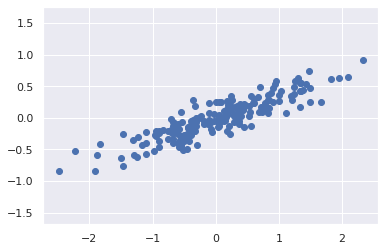

In [5]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Let's use the <a href="#">PCA</a>  class from scikit-learn package

In [6]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

Fitting the PCA instance, gives us access to the computed components and the explained variance.

In [7]:
print("PCA components: ")
print(pca.components_)
print("PCA explained variance: ")
print(pca.explained_variance_)

PCA components: 
[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
PCA explained variance: 
[0.7625315 0.0184779]


During the first step, PCA rotates the data so that it is aligned with the axes. It does so by shifting the data so that they have zero mean. 
No information is lost during this step. Thus the resulting PCA features are not linearly correlated.

----
**Intrinsic Dimension**

The intrinsic dimension of a dataset is the number of features needed to approximate it
We can detect it by visualizing the datase using a scatter plot. Howver, this will work if we have up to three features. PCA identifies the intrinsic dimension for any number of features. In the latter case, the intinsic dimension will be equal to the number of PCA features with significant variance. 

----

Qualitatively, PCA drops the features with low variance as it assumes this to be noise and accepts the high variance features which assumes to be informative. So how do we chose how many components to keep? A good choice is the intrinsic dimension of the data set assuming of course that we do know it. Alternatively, we can experiment according to the study in hand.

----
**Remark**

The intrinsic data set dimension is a useful idea to guide us. However, it can be ambiguous; there is not always one correct answer.

----

----
**Remark**
The ```PCA``` class in  ```sklearn```  does the decorrelation step when calling the ```fit()``` method. It applies the learnt transformation when calling ```transform()```.

----

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine

In [10]:
samples = [[3.312, 5.763],
 [3.333, 5.554],
 [3.337, 5.291],
 [3.379, 5.324],
 [3.562, 5.658],
 [3.312, 5.386],
 [3.259, 5.563],
 [3.302, 5.42 ],
 [3.465, 6.053],
 [3.505, 5.884],
 [3.242, 5.714],
 [3.201, 5.438],
 [3.199, 5.439],
 [3.156, 5.479],
 [3.114, 5.482],
 [3.333, 5.351],
 [3.383, 5.119],
 [3.514, 5.527],
 [3.466, 5.205],
 [3.049, 5.226],
 [3.129, 5.658],
 [3.168, 5.52 ],
 [3.507, 5.618],
 [2.936, 5.099],
 [3.245, 5.789],
 [3.421, 5.833],
 [3.026, 5.395],
 [2.956, 5.395],
 [3.221, 5.541],
 [3.065, 5.516],
 [2.975, 5.454],
 [3.371, 5.757],
 [3.186, 5.717],
 [3.15 , 5.585],
 [3.328, 5.712],
 [3.485, 5.709],
 [3.464, 5.826],
 [3.683, 5.832],
 [3.288, 5.656],
 [3.298, 5.397],
 [3.156, 5.348],
 [3.158, 5.351],
 [3.201, 5.138],
 [3.396, 5.877],
 [3.462, 5.579],
 [3.155, 5.376],
 [3.393, 5.701],
 [3.377, 5.57 ],
 [3.291, 5.545],
 [3.258, 5.678],
 [3.272, 5.585],
 [3.434, 5.674],
 [3.113, 5.715],
 [3.199, 5.504],
 [3.113, 5.741],
 [3.212, 5.702],
 [3.377, 5.388],
 [3.412, 5.384],
 [3.419, 5.662],
 [3.032, 5.159],
 [2.85,  5.008],
 [2.879, 4.902],
 [3.042, 5.076],
 [3.07,  5.395],
 [3.026, 5.262],
 [3.119, 5.139],
 [3.19,  5.63 ],
 [3.158, 5.609],
 [3.153, 5.569],
 [2.882, 5.412],
 [3.561, 6.191],
 [3.484, 5.998],
 [3.594, 5.978],
 [3.93,  6.154],
 [3.486, 6.017],
 [3.438, 5.927],
 [3.403, 6.064],
 [3.814, 6.579],
 [3.639, 6.445],
 [3.566, 5.85 ],
 [3.467, 5.875],
 [3.857, 6.006],
 [3.864, 6.285],
 [3.772, 6.384],
 [3.801, 6.366],
 [3.651, 6.173],
 [3.764, 6.084],
 [3.67,  6.549],
 [4.033, 6.573],
 [4.032, 6.45 ],
 [3.785, 6.581],
 [3.796, 6.172],
 [3.693, 6.272],
 [3.86,  6.037],
 [3.485, 6.666],
 [3.463, 6.139],
 [3.81,  6.341],
 [3.552, 6.449],
 [3.512, 6.271],
 [3.684, 6.219],
 [3.525, 5.718],
 [3.694, 5.89 ],
 [3.892, 6.113],
 [3.681, 6.369],
 [3.755, 6.248],
 [3.786, 6.037],
 [3.806, 6.152],
 [3.573, 6.033],
 [3.763, 6.675],
 [3.674, 6.153],
 [3.769, 6.107],
 [3.791, 6.303],
 [3.902, 6.183],
 [3.737, 6.259],
 [3.991, 6.563],
 [3.719, 6.416],
 [3.897, 6.051],
 [3.815, 6.245],
 [3.769, 6.227],
 [3.857, 6.493],
 [3.962, 6.315],
 [3.563, 6.059],
 [3.387, 5.762],
 [3.771, 5.98 ],
 [3.582, 5.363],
 [3.869, 6.111],
 [3.594, 6.285],
 [3.687, 5.979],
 [3.773, 6.513],
 [3.69,  5.791],
 [3.755, 5.979],
 [3.825, 6.144],
 [3.268, 5.884],
 [3.395, 5.845],
 [3.408, 5.776],
 [3.465, 5.477],
 [3.574, 6.145],
 [3.231, 5.92 ],
 [3.286, 5.832],
 [3.472, 5.872],
 [2.994, 5.472],
 [3.073, 5.541],
 [3.074, 5.389],
 [2.967, 5.224],
 [2.777, 5.314],
 [2.687, 5.279],
 [2.719, 5.176],
 [2.967, 5.267],
 [2.911, 5.386],
 [2.648, 5.317],
 [2.84,  5.263],
 [2.776, 5.405],
 [2.833, 5.408],
 [2.693, 5.22 ],
 [2.755, 5.175],
 [2.675, 5.25 ],
 [2.849, 5.053],
 [2.745, 5.394],
 [2.678, 5.444],
 [2.695, 5.304],
 [2.879, 5.451],
 [2.81 , 5.35 ],
 [2.847, 5.267],
 [2.968, 5.333],
 [2.794, 5.011],
 [2.941, 5.105],
 [2.897, 5.319],
 [2.837, 5.417],
 [2.668, 5.176],
 [2.715, 5.09 ],
 [2.701, 5.325],
 [2.845, 5.167],
 [2.763, 5.088],
 [2.763, 5.136],
 [2.641, 5.278],
 [2.821, 4.981],
 [2.71 , 5.186],
 [2.642, 5.145],
 [2.758, 5.18 ],
 [2.893, 5.357],
 [2.775, 5.09 ],
 [3.017, 5.236],
 [2.909, 5.24 ],
 [2.85 , 5.108],
 [3.026, 5.495],
 [2.683, 5.363],
 [2.716, 5.413],
 [2.675, 5.088],
 [2.821, 5.089],
 [2.787, 4.899],
 [2.717, 5.046],
 [2.804, 5.091],
 [2.953, 5.132],
 [2.63 , 5.18 ],
 [2.975, 5.236],
 [3.126, 5.16 ],
 [3.054, 5.224],
 [3.128, 5.32 ],
 [2.911, 5.41 ],
 [3.155, 5.073],
 [2.989, 5.219],
 [3.135, 4.984],
 [2.81 , 5.009],
 [3.091, 5.183],
 [2.96 , 5.204],
 [2.981, 5.137],
 [2.795, 5.14 ],
 [3.232, 5.236],
 [2.836,5.175],
 [2.974,5.243]]

In [11]:
model = PCA()

In [12]:
model.fit(samples)

PCA()

In [14]:
# Make a scatter plot of the untransformed points
plt.scatter(samples[:,0], samples[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

TypeError: list indices must be integers or slices, not tuple

The principal components are direction in which the samples vary the most. Hence, principla components are directions of variance. It is the principal components  that PCA aligns with the coordinate axes. 

In [ ]:
samples = [[ 242.    23.2   25.4   30.    38.4   13.4]
 [ 290.    24.    26.3   31.2   40.    13.8]
 [ 340.    23.9   26.5   31.1   39.8   15.1]
 [ 363.    26.3   29.    33.5   38.    13.3]
 [ 430.    26.5   29.    34.    36.6   15.1]
 [ 450.    26.8   29.7   34.7   39.2   14.2]
 [ 500.    26.8   29.7   34.5   41.1   15.3]
 [ 390.    27.6   30.    35.    36.2   13.4]
 [ 450.    27.6   30.    35.1   39.9   13.8]
 [ 500.    28.5   30.7   36.2   39.3   13.7]
 [ 475.    28.4   31.    36.2   39.4   14.1]
 [ 500.    28.7   31.    36.2   39.7   13.3]
 [ 500.    29.1   31.5   36.4   37.8   12. ]
 [ 600.    29.4   32.    37.2   40.2   13.9]
 [ 600.    29.4   32.    37.2   41.5   15. ]
 [ 700.    30.4   33.    38.3   38.8   13.8]
 [ 700.    30.4   33.    38.5   38.8   13.5]
 [ 610.    30.9   33.5   38.6   40.5   13.3]
 [ 650.    31.    33.5   38.7   37.4   14.8]
 [ 575.    31.3   34.    39.5   38.3   14.1]
 [ 685.    31.4   34.    39.2   40.8   13.7]
 [ 620.    31.5   34.5   39.7   39.1   13.3]
 [ 680.    31.8   35.    40.6   38.1   15.1]
 [ 700.    31.9   35.    40.5   40.1   13.8]
 [ 725.    31.8   35.    40.9   40.    14.8]
 [ 720.    32.    35.    40.6   40.3   15. ]
 [ 714.    32.7   36.    41.5   39.8   14.1]
 [ 850.    32.8   36.    41.6   40.6   14.9]
 [1000.    33.5   37.    42.6   44.5   15.5]
 [ 920.    35.    38.5   44.1   40.9   14.3]
 [ 955.    35.    38.5   44.    41.1   14.3]
 [ 925.    36.2   39.5   45.3   41.4   14.9]
 [ 975.    37.4   41.    45.9   40.6   14.7]
 [ 950.    38.    41.    46.5   37.9   13.7]
 [  40.    12.9   14.1   16.2   25.6   14. ]
 [  69.    16.5   18.2   20.3   26.1   13.9]
 [  78.    17.5   18.8   21.2   26.3   13.7]
 [  87.    18.2   19.8   22.2   25.3   14.3]
 [ 120.    18.6   20.    22.2   28.    16.1]
 [   0.    19.    20.5   22.8   28.4   14.7]
 [ 110.    19.1   20.8   23.1   26.7   14.7]
 [ 120.    19.4   21.    23.7   25.8   13.9]
 [ 150.    20.4   22.    24.7   23.5   15.2]
 [ 145.    20.5   22.    24.3   27.3   14.6]
 [ 160.    20.5   22.5   25.3   27.8   15.1]
 [ 140.    21.    22.5   25.    26.2   13.3]
 [ 160.    21.1   22.5   25.    25.6   15.2]
 [ 169.    22.    24.    27.2   27.7   14.1]
 [ 161.    22.    23.4   26.7   25.9   13.6]
 [ 200.    22.1   23.5   26.8   27.6   15.4]
 [ 180.    23.6   25.2   27.9   25.4   14. ]
 [ 290.    24.    26.    29.2   30.4   15.4]
 [ 272.    25.    27.    30.6   28.    15.6]
 [ 390.    29.5   31.7   35.    27.1   15.3]
 [   6.7    9.3    9.8   10.8   16.1    9.7]
 [   7.5   10.    10.5   11.6   17.    10. ]
 [   7.    10.1   10.6   11.6   14.9    9.9]
 [   9.7   10.4   11.    12.    18.3   11.5]
 [   9.8   10.7   11.2   12.4   16.8   10.3]
 [   8.7   10.8   11.3   12.6   15.7   10.2]
 [  10.    11.3   11.8   13.1   16.9    9.8]
 [   9.9   11.3   11.8   13.1   16.9    8.9]
 [   9.8   11.4   12.    13.2   16.7    8.7]
 [  12.2   11.5   12.2   13.4   15.6   10.4]
 [  13.4   11.7   12.4   13.5   18.     9.4]
 [  12.2   12.1   13.    13.8   16.5    9.1]
 [  19.7   13.2   14.3   15.2   18.9   13.6]
 [  19.9   13.8   15.    16.2   18.1   11.6]
 [ 200.    30.    32.3   34.8   16.     9.7]
 [ 300.    31.7   34.    37.8   15.1   11. ]
 [ 300.    32.7   35.    38.8   15.3   11.3]
 [ 300.    34.8   37.3   39.8   15.8   10.1]
 [ 430.    35.5   38.    40.5   18.    11.3]
 [ 345.    36.    38.5   41.    15.6    9.7]
 [ 456.    40.    42.5   45.5   16.     9.5]
 [ 510.    40.    42.5   45.5   15.     9.8]
 [ 540.    40.1   43.    45.8   17.    11.2]
 [ 500.    42.    45.    48.    14.5   10.2]
 [ 567.    43.2   46.    48.7   16.    10. ]
 [ 770.    44.8   48.    51.2   15.    10.5]
 [ 950.    48.3   51.7   55.1   16.2   11.2]
 [1250.    52.    56.    59.7   17.9   11.7]
 [1600.    56.    60.    64.    15.     9.6]
 [1550.    56.    60.    64.    15.     9.6]
 [1650.    59.    63.4   68.    15.9   11. ]]

In [ ]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

Let's consider the following $\boldsymbol{\Psi}$ matrix

$$\boldsymbol{\Psi} = \sigma^2 \boldsymbol{I}$$ 

and also assume that $\mathbf{W}$ to be orthonormal. As $\sigma^2\rightarrow 0$ this model reduces to classical PCA, see [2] and references therein. For $\sigma^2 > 0$ is known as probabilistic PCA [2].

According to [2] the synthesis view of classical PCA is summarized in the following theorem

----
**Theorem**

_Suppose we want to find an orthogonal set of $L$ linear basis vectors $\mathbf{w}_j \in \mathbb{R}^D$ and the corresponding scores $\mathbf{z}_i \in \mathbb{R}^L$ such that we minimize the average reconstruction error_

$$J(\mathbf{W}, \mathbf{Z}) = \frac{1}{N}\sum_{i=1}^{N}||\mathbf{x}_i - \hat{\mathbf{x}}_i||^2$$

_where $\hat{\mathbf{x}}_i=\mathbf{W}\mathbf{z}_i$ subject to the constraint that $\mathbf{w}$ is orthonormal. Equivalently, we can write the objective above as_

$$J(\mathbf{W}, \mathbf{Z}) = ||\mathbf{X} - \mathbf{W}\mathbf{z}||^{2}_{F}$$

_where $\mathbf{Z}$ is an $N\times L$ matrix with the $\mathbf{z}_i$ in its rows and $||\mathbf{A}||_F$ is the Frobenius norm of the matrix $\mathbf{A}$._

_The optimal solution is obtained by setting $\hat{\mathbf{W}}=\mathbf{V}_L$ where $\mathbf{V}_L$ contains the $L$ eigenvectors with largests eigenvalues of the empirical covariance matrix_ 

$$\hat{\boldsymbol{\Sigma}} = \frac{1}{N}\sum_{i=1}^{N}\mathbf{x}_i\mathbf{x}_{i}^T$$

_The optimal low-dimensional encoding of the data is given by $\hat{\mathbf{z}}_i = \mathbf{W}^T\mathbf{x}_i$ which is an orthogonal projection of the data onto the column spanned by the eigenvectors._

----

The principal directions are the ones along which the data shows maximal variance. This means the PCA can be misled by directions in which the variance is high because of the measurement scale. Therefore, in practice  we will standardize the data first or equivalently work with <a href="https://en.wikipedia.org/wiki/Correlation_and_dependence">correlation matrices</a> rather than <a href="https://en.wikipedia.org/wiki/Covariance_matrix">covariance matrices</a>.

### <a name="sub_sect_1"></a> Singular value decomposition

<a href="https://en.wikipedia.org/wiki/Singular_value_decomposition">Singular value decomposition or SVD</a> is a factorization of a real or complex matrix that generalizes the eigendecomposition of a square normal matrix to any $m \times n$ matrix via an extension of the polar decomposition. Concretely any $m \times n$ can be decomposed as [2]

$$\mathbf{X}_{m\times n} = \mathbf{U}_{m\times m}\mathbf{S}_{m\times n}\mathbf{V}_{n\times n}^T$$

where

- $\mathbf{U}_{m\times m}$ is an orthonormal matrix i.e. $\mathbf{U}^T\mathbf{U}=\mathbf{I}$
- $\mathbf{V}_{n\times n}$ is a matrix whose columns and rows are orthonormal i.e. $\mathbf{V}^T\mathbf{V}=\mathbf{V}\mathbf{V}^T=\mathbf{I}$
- $\mathbf{S}_{m\times n}$ is a matrix containing the $r=min(m,n)$ singular values $\sigma_i \geq 0$ on the main diagonal 

The columns of $\mathbf{U}_{m\times m}$ are the left singular vectors and the columns of $\mathbf{V}_{n\times n}$ are the right singular vectors [2].

PCA is the best low rank approximation to the data [2]. Concrtely, 

$$\hat{\mathbf{X}} = \mathbf{U}\mathbf{S}\mathbf{V}^T$$

In [1]:
import numpy as np
from sklearn.decomposition import PCA

In [2]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])

In [3]:
pca = PCA(n_components=2, svd_solver='full')
pca.fit(X)
print(pca.explained_variance_ratio_)

[0.99244289 0.00755711]


Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array samples. Also available is a modified version of the show_as_image() function which colors a pixel red if the value is negative.

## Summary

## <a name="refs"></a> References

1. <a href="https://en.wikipedia.org/wiki/Principal_component_analysis">Principal component analysis</a>.
2. Kevin P. Murphy, ```Machine Learning A Probabilistic Perspective```, The MIT Press.
3. <a href="https://en.wikipedia.org/wiki/Singular_value_decomposition">Singular value decomposition</a>
4. <a href="https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html">In Depth: Principal Component Analysis</a>
5. Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani, Jonathan Taylor, _An Introduction to Statistical Learning_, 2nd Edition, Springer, 2021.